In [44]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import percentileofscore
from yellowbrick.cluster import SilhouetteVisualizer


In [45]:
repeat_customers_df = pd.read_feather("repeat_customers_df.ftr")

with pd.option_context("display.max_columns", None):
    display(repeat_customers_df)


,customer_unique_id,total_orders,total_prods_ordered,first_customer_review_score,avg_customer_review_score,reordered,high_first_rating,order_ids,order_purchase_timestamps,total_spent,order_delay_days,years_since_last_purchase,months_since_last_purchase,orders_per_year,orders_per_month,spent_per_year,spent_per_month,proport_payments_by_credit_card,proport_payments_by_boleto,proport_payments_by_voucher,proport_payments_by_debit_card,proport_payments_by_not_defined,proport_orders_paid_in_install,proport_orders_paid_lump_sum
0,4c93744516667ad3b8f1fb645a3116a4,2,2,5.0,5.0,True,True,"[5741ea1f91b5fbab2bd2dc653a5b5099, 98b737f8bd0...","[2017-10-15T12:44:13.000000, 2017-09-14T18:14:...",565.88,30.770625,0.867168,10.406011,2.098210,0.174851,593.667462,49.472289,0.5,0.0,0.0,0.5,0.0,0.0,1.0
1,1175e95fb47ddff9de6b2b06188f7e0d,2,2,5.0,5.0,True,True,"[7845a2492ab1b4f2cf3d56c7b8da1446, 1ebeea841c5...","[2018-01-18T12:35:45.000000, 2018-01-18T12:35:...",83.19,0.000012,0.607621,7.291449,3.284782,0.273732,136.630492,11.385874,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,295c05e81917928d76245e842748184d,2,2,3.0,4.0,True,False,"[cf5e115a19c54f0457aa4c00fb88ae63, 852d2f4d377...","[2018-06-06T11:59:53.000000, 2018-03-07T15:57:...",281.50,90.835174,0.227907,2.734889,4.192270,0.349356,590.061971,49.171831,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,e9dd12dca17352644a959d9dea133935,2,2,3.0,4.0,True,False,"[19c0c76962278b152cc44fc63ffd5e48, f916cacb752...","[2018-04-18T09:42:53.000000, 2018-03-05T18:12:...",113.83,43.646273,0.362047,4.344565,4.146904,0.345575,236.021030,19.668419,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,e079b18794454de9d2be5c12b4392294,2,6,5.0,5.0,True,True,"[77b062be7c5bd21712905feb8e1cfeed, 7e3fefb35b0...","[2017-06-14T18:52:29.000000, 2017-06-14T18:31:...",437.78,0.014294,1.202534,14.430412,1.659692,0.138308,363.290007,30.274167,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,574e36a816bf7a295404e686062fc0de,2,3,4.0,4.5,True,True,"[25c0762610a416a21571e4ab3cf179b8, 325c8590cc2...","[2018-04-26T18:07:40.000000, 2017-06-06T17:00:...",222.86,324.046782,0.339231,4.070777,1.629833,0.135819,181.612268,15.134356,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2797,76f7d40948174f5cde0fcf8e6147b59d,2,4,2.0,2.0,True,False,"[09d49d145e25e27490765a4085a8e720, b95ee76467f...","[2018-04-29T22:59:41.000000, 2017-12-30T00:06:...",373.60,120.953472,0.330481,3.965768,3.019726,0.251644,564.084767,47.007064,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2798,88fcb680dc8cd2e540010c0750b78242,2,2,4.0,4.0,True,True,"[eda613a4e8989dac08362e3326431eaa, 00772b2af35...","[2018-01-19T08:02:06.000000, 2017-04-24T10:53:...",118.61,269.881181,0.605408,7.264893,1.486386,0.123866,88.150136,7.345845,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2799,2dcbfb99d95c7ba6eb992a98627f45b8,2,3,1.0,1.0,True,False,"[ce5f998d724ed1ac61c890e33b24a33f, 4035b52134b...","[2017-12-03T20:37:09.000000, 2017-11-28T01:16:...",285.23,5.806042,0.732390,8.788685,2.667412,0.222284,380.412988,31.701082,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
rfm_df = repeat_customers_df[
    [
        "customer_unique_id",
        "avg_customer_review_score",
        "months_since_last_purchase",
        "orders_per_month",
        "spent_per_month",
    ]
]
rfm_desc = rfm_df.describe()
recency_std = rfm_desc.loc["std", :]["months_since_last_purchase"]
recency_mean = rfm_desc.loc["mean", :]["months_since_last_purchase"]
frequency_std = rfm_desc.loc["std", :]["orders_per_month"]
frequency_mean = rfm_desc.loc["mean", :]["orders_per_month"]
monetary_std = rfm_desc.loc["std", :]["spent_per_month"]
monetary_mean = rfm_desc.loc["mean", :]["spent_per_month"]

print(f"Months since last order STD:\t{recency_std}")
print(f"Months since last order mean:\t{recency_mean}")
print(f"Orders per month STD:\t\t{frequency_std}")
print(f"Orders per month mean:\t\t{frequency_mean}")
print(f"Amount spent per month STD:\t{monetary_std}")
print(f"Amount spent per month mean:\t{monetary_mean}")


Months since last order STD:	4.71035502624664
Months since last order mean:	7.179241860315521
Orders per month STD:		0.5312393777145199
Orders per month mean:		0.34094057102859004
Amount spent per month STD:	157.48305094710398
Amount spent per month mean:	51.86110352550043


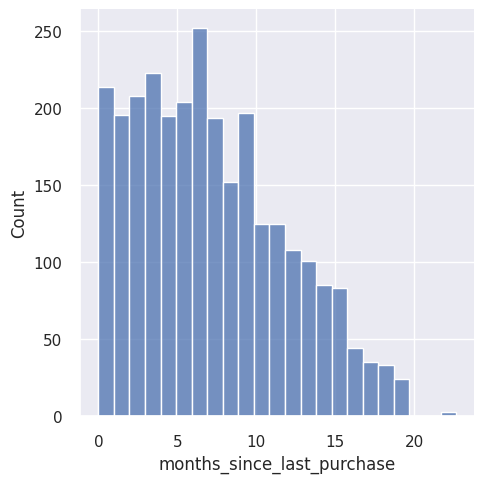

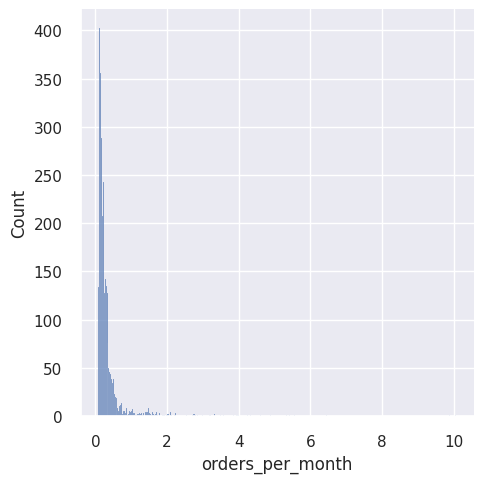

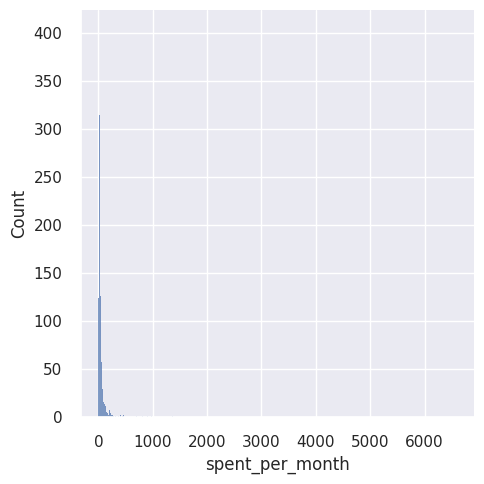

In [47]:
sns.set(style="darkgrid")
sns.displot(rfm_df, x="months_since_last_purchase")
plt.show()
sns.displot(rfm_df, x="orders_per_month")
plt.show()
sns.displot(rfm_df, x="spent_per_month")
plt.show()


Percent dropped by z-score: 2.0


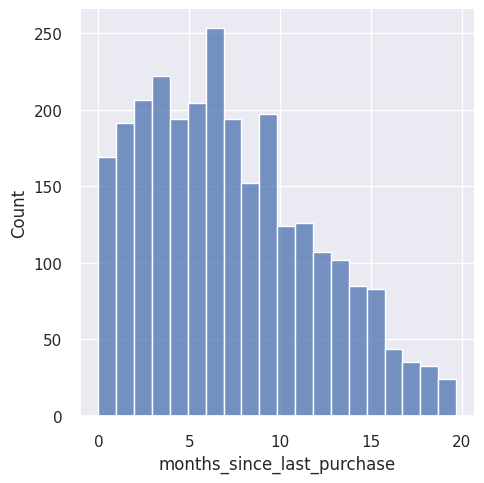

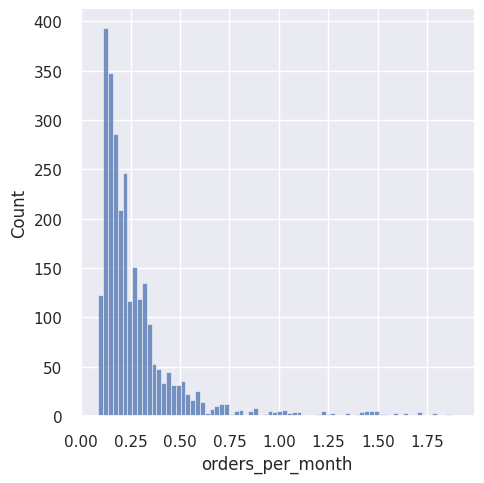

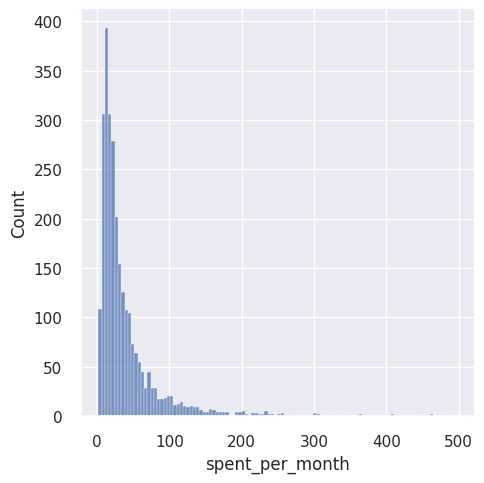

In [48]:
rfm_no_z_outliers_df = (
    rfm_df.drop(
        index=list(
            set(
                rfm_df.loc[
                    (
                        rfm_df["months_since_last_purchase"]
                        < recency_mean - recency_std * 3
                    )
                    | (
                        rfm_df["months_since_last_purchase"]
                        > recency_mean + recency_std * 3
                    )
                ].index.to_list()
                + rfm_df.loc[
                    (rfm_df["orders_per_month"] < frequency_mean - frequency_std * 3)
                    | (rfm_df["orders_per_month"] > frequency_mean + frequency_std * 3)
                ].index.to_list()
                + rfm_df.loc[
                    (rfm_df["spent_per_month"] < monetary_mean - monetary_std * 3)
                    | (rfm_df["spent_per_month"] > monetary_mean + monetary_std * 3)
                ].index.to_list()
            )
        )
    )
    .reset_index()
    .drop("index", axis=1)
)

print(
    f"Percent dropped by z-score: {round((rfm_df.shape[0] - rfm_no_z_outliers_df.shape[0]) / rfm_df.shape[0] * 100, 2)}"
)
sns.set(style="darkgrid")
sns.displot(rfm_no_z_outliers_df, x="months_since_last_purchase")
plt.show()
sns.displot(rfm_no_z_outliers_df, x="orders_per_month")
plt.show()
sns.displot(rfm_no_z_outliers_df, x="spent_per_month")
plt.show()


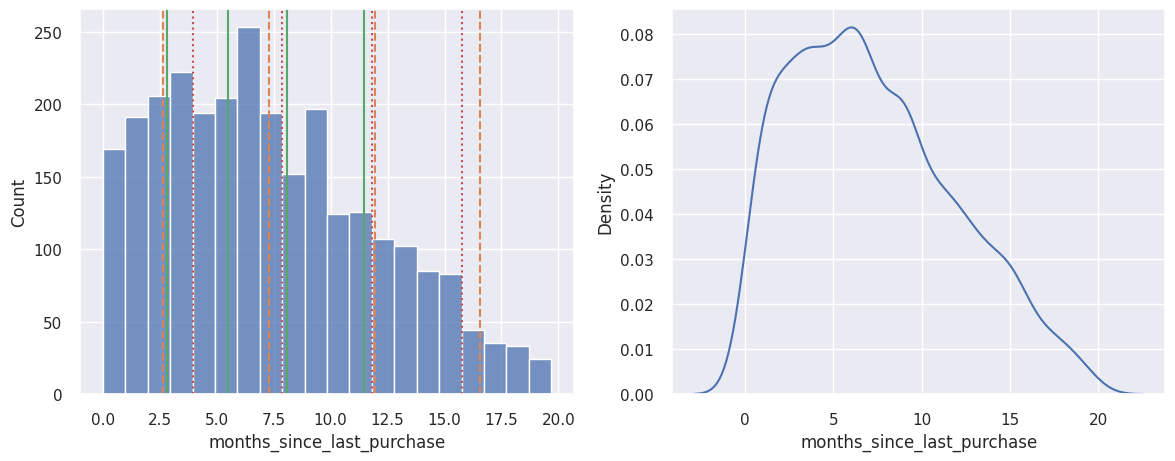

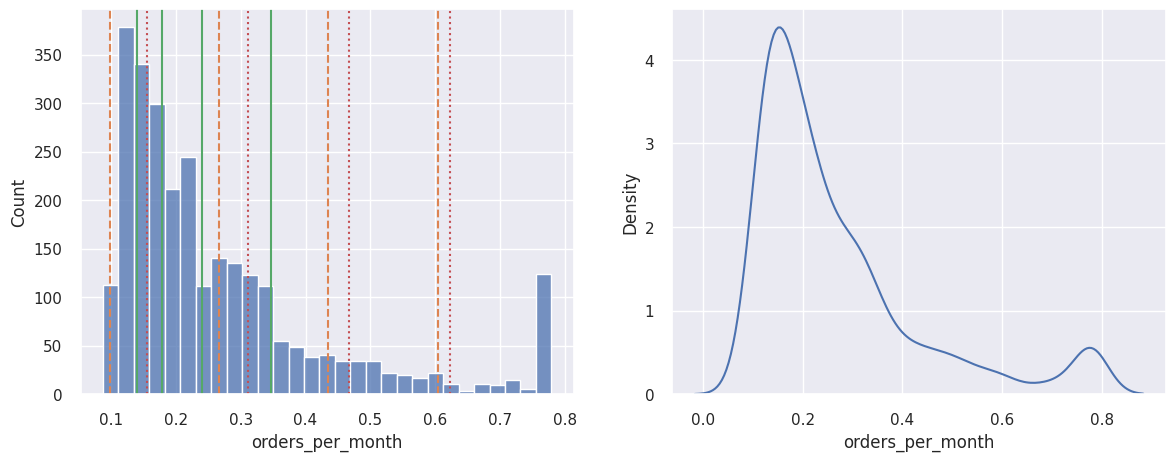

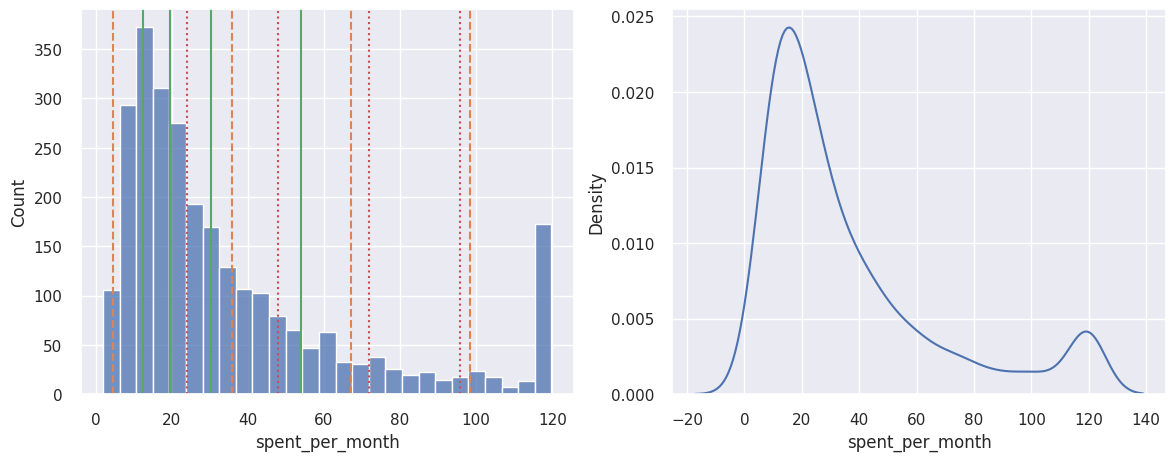

In [49]:
def get_upper_quantile(df, column):
    upper_quantile = 0

    for quantile in [x / 1000 for x in range(500, 1000)]:
        temp_quantile = df[column].quantile(quantile)

        if df.loc[df[column] < temp_quantile][column].skew() > 1.5:
            return upper_quantile

        upper_quantile = temp_quantile


rfm_no_outliers_df = rfm_no_z_outliers_df
upper_quantile_val = get_upper_quantile(rfm_no_outliers_df, "orders_per_month")
rfm_no_outliers_df.loc[
    rfm_no_outliers_df["orders_per_month"] > upper_quantile_val, "orders_per_month"
] = upper_quantile_val
upper_quantile_val = get_upper_quantile(rfm_no_outliers_df, "spent_per_month")
rfm_no_outliers_df.loc[
    rfm_no_outliers_df["spent_per_month"] > upper_quantile_val, "spent_per_month"
] = upper_quantile_val
theme_clrs = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for x in ["months_since_last_purchase", "orders_per_month", "spent_per_month"]:
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs = axs.flatten()
    mean = rfm_no_outliers_df[x].mean()
    std = rfm_no_outliers_df[x].std()

    fig.set_figwidth(14)
    fig.set_figheight(5)
    sns.set(style="darkgrid")
    sns.histplot(rfm_no_outliers_df, x=x, ax=axs[0])
    axs[0].axvline(mean, color=theme_clrs[1], linestyle="--")

    for num_std in [1, 2]:
        axs[0].axvline(mean + std * num_std, color=theme_clrs[1], linestyle="--")
        if num_std < 2:
            axs[0].axvline(
                mean - std * num_std if mean - std * num_std >= 0 else 0,
                color=theme_clrs[1],
                linestyle="--",
            )
    
    for quant in [0.2, 0.4, 0.6, 0.8]:
        axs[0].axvline(rfm_no_outliers_df[x].quantile(quant), color=theme_clrs[2], linestyle="-")
    
    for fifth in [1, 2, 3, 4]:
        axs[0].axvline(rfm_no_outliers_df[x].max() * fifth / 5, color=theme_clrs[3], linestyle=":")

    sns.kdeplot(rfm_no_outliers_df, x=x, ax=axs[1])
    plt.show()


In [50]:
rfm_normalized = rfm_no_outliers_df
col_name_to_metric = {
    "months_since_last_purchase": "recency",
    "orders_per_month": "frequency",
    "spent_per_month": "monetary",
}

for col_name in ["months_since_last_purchase", "orders_per_month", "spent_per_month"]:
    z_scaled = [
        x + 2
        for x in [
            x[0]
            for x in StandardScaler()
            .fit_transform(rfm_normalized[col_name].to_numpy().reshape(-1, 1))
            .tolist()
        ]
    ]

    if col_name == "months_since_last_purchase":
        z_scaled = [x * -1 + 5 for x in z_scaled]

    z_scaled = [5 if x > 5 else x for x in z_scaled]
    rfm_normalized[col_name_to_metric[col_name] + "_z_scaled"] = z_scaled

for col_name in ["months_since_last_purchase", "orders_per_month", "spent_per_month"]:
    quant_scaled = [
        percentileofscore(rfm_normalized[col_name].to_list(), x, kind="weak") / 20
        for x in rfm_normalized[col_name].to_list()
    ]

    if col_name == "months_since_last_purchase":
        quant_scaled = [x * -1 + 5 for x in quant_scaled]

    rfm_normalized[col_name_to_metric[col_name] + "_quant_scaled"] = quant_scaled

for col_name in ["months_since_last_purchase", "orders_per_month", "spent_per_month"]:
    min_max_scaled = [
        x * 5
        for x in [
            x[0]
            for x in MinMaxScaler()
            .fit_transform(rfm_normalized[col_name].to_numpy().reshape(-1, 1))
            .tolist()
        ]
    ]

    if col_name == "months_since_last_purchase":
        min_max_scaled = [x * -1 + 5 for x in min_max_scaled]

    rfm_normalized[col_name_to_metric[col_name] + "_min_max_scaled"] = min_max_scaled

display(rfm_normalized)


,customer_unique_id,avg_customer_review_score,months_since_last_purchase,orders_per_month,spent_per_month,recency_z_scaled,frequency_z_scaled,monetary_z_scaled,recency_quant_scaled,frequency_quant_scaled,monetary_quant_scaled,recency_min_max_scaled,frequency_min_max_scaled,monetary_min_max_scaled
0,4c93744516667ad3b8f1fb645a3116a4,5.0,10.406011,0.174851,49.472289,2.328123,1.454149,2.436852,1.255009,1.901639,3.879781,2.356975,0.629732,2.017197
1,1175e95fb47ddff9de6b2b06188f7e0d,5.0,7.291449,0.273732,11.385874,2.999351,2.041552,1.216010,2.238616,3.306011,0.821494,3.148043,1.345087,0.400911
2,295c05e81917928d76245e842748184d,4.0,2.734889,0.349356,49.171831,3.981349,2.490797,2.427221,4.049180,4.010929,3.865209,4.305365,1.892189,2.004446
3,e9dd12dca17352644a959d9dea133935,4.0,4.344565,0.345575,19.668419,3.634443,2.468339,1.481503,3.418944,3.985428,2.001821,3.896523,1.864839,0.752400
4,e079b18794454de9d2be5c12b4392294,5.0,14.430412,0.138308,30.274167,1.460812,1.237065,1.821465,0.466302,0.978142,3.000000,1.334816,0.365361,1.202480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,574e36a816bf7a295404e686062fc0de,4.5,4.070777,0.135819,15.134356,3.693448,1.222283,1.336166,3.513661,0.908925,1.428051,3.966062,0.347359,0.559986
2741,76f7d40948174f5cde0fcf8e6147b59d,2.0,3.965768,0.251644,47.007064,3.716079,1.910338,2.357830,3.553734,3.074681,3.806922,3.992734,1.185291,1.912579
2742,88fcb680dc8cd2e540010c0750b78242,4.0,7.264893,0.123866,7.345845,3.005075,1.151271,1.086509,2.247723,0.526412,0.295082,3.154788,0.260879,0.229463
2743,2dcbfb99d95c7ba6eb992a98627f45b8,1.0,8.788685,0.222284,31.701082,2.676678,1.735928,1.867204,1.774135,2.741348,3.081967,2.767760,0.972890,1.263034


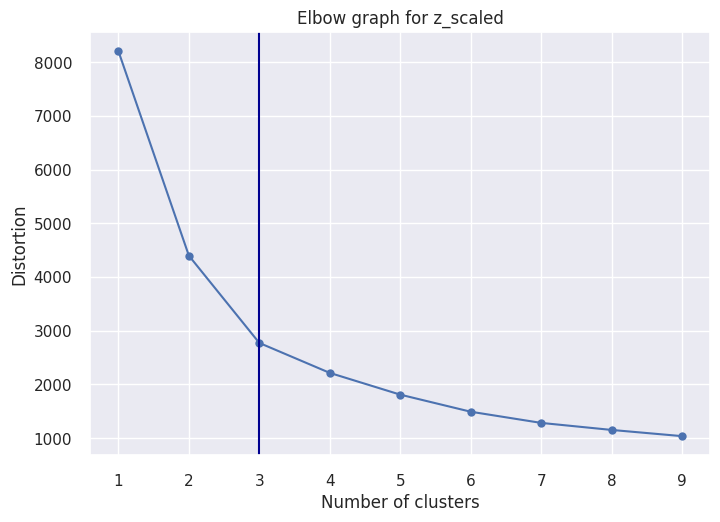

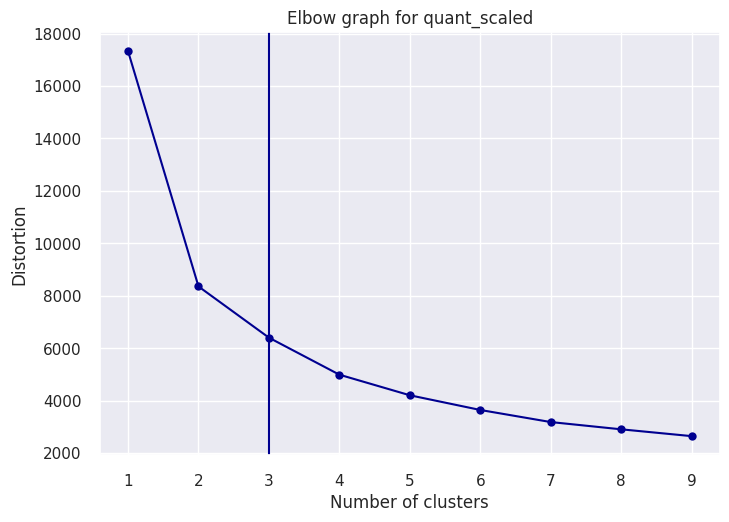

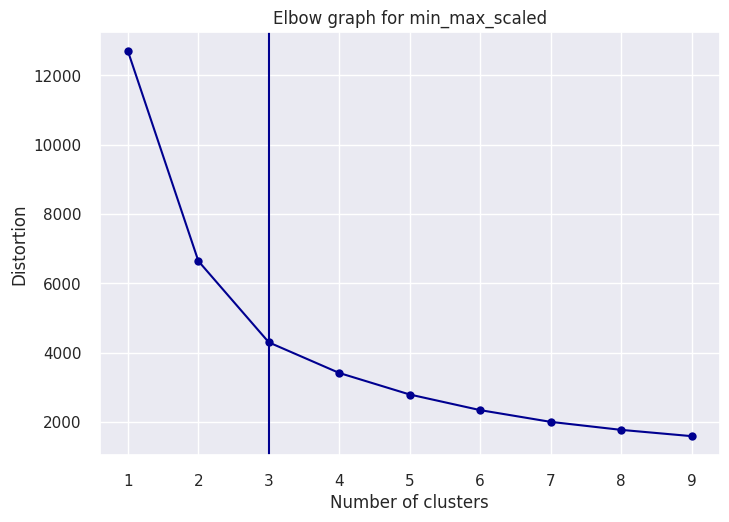

In [51]:
num_clusters = {}

for scaling_type in ["z_scaled", "quant_scaled", "min_max_scaled"]:
    distortions = []

    for i in range(1, 10):
        k_means_model = KMeans(n_clusters=i, n_init=10, random_state=0)

        k_means_model.fit(
            rfm_normalized[
                [
                    "recency_" + scaling_type,
                    "frequency_" + scaling_type,
                    "monetary_" + scaling_type,
                ]
            ]
        )
        distortions.append(k_means_model.inertia_)

    num_clusters[scaling_type] = KneeLocator(
        range(1, 10), distortions, curve="convex", direction="decreasing"
    ).elbow
    # num_clusters[scaling_type] = KneeLocator(
    #     range(1, 10), distortions, curve="convex", direction="decreasing"
    # ).elbow + 1

    plt.plot(range(1, 10), distortions, marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")
    plt.title("Elbow graph for " + scaling_type)
    plt.axvline(num_clusters[scaling_type])
    sns.set_style("darkgrid")
    sns.set_palette("gnuplot2")
    plt.show()


z_scaled


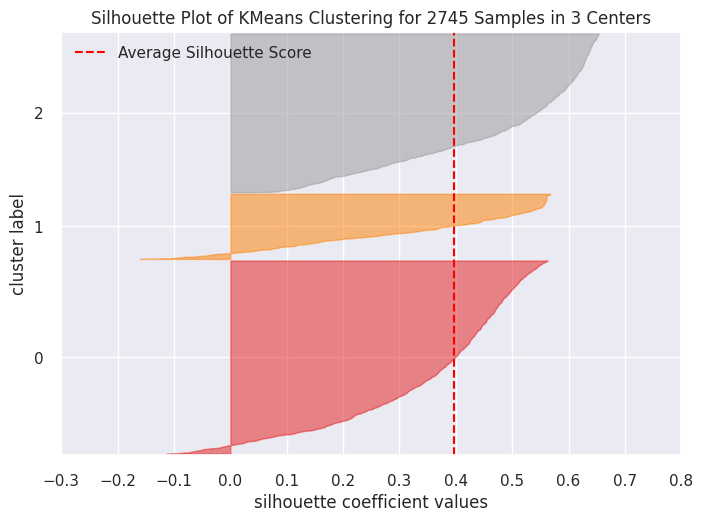

quant_scaled


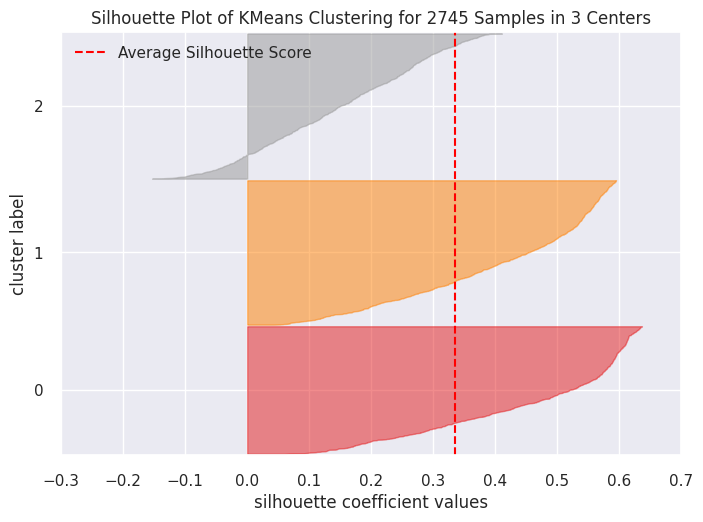

min_max_scaled


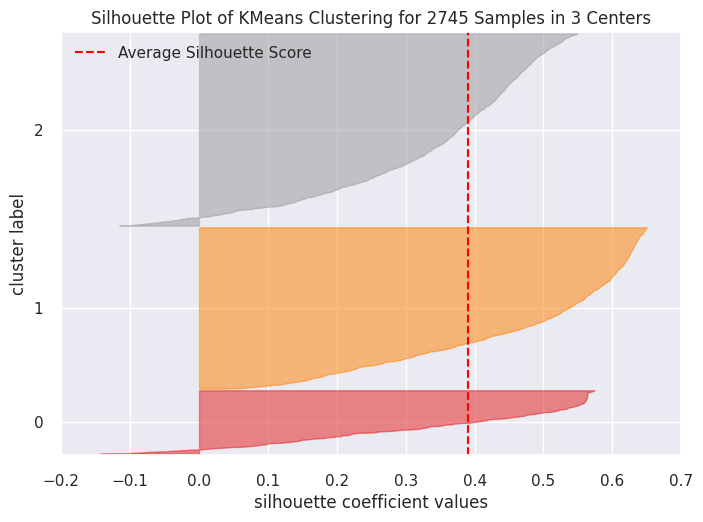

In [52]:
for scaling_type in ["z_scaled", "quant_scaled", "min_max_scaled"]:
    sil_vis = SilhouetteVisualizer(
        KMeans(n_clusters=num_clusters[scaling_type], n_init=10, random_state=0)
    )

    sil_vis.fit(
        rfm_normalized[
            [
                "recency_" + scaling_type,
                "frequency_" + scaling_type,
                "monetary_" + scaling_type,
            ]
        ]
    )
    print(scaling_type)
    sns.set_style("darkgrid")
    sil_vis.show()


In [53]:
rfm_with_cluster_kmeans = rfm_normalized

for scaling_type in ["z_scaled", "quant_scaled", "min_max_scaled"]:
    rfm_with_cluster_kmeans[scaling_type + "_cluster_kmeans"] = KMeans(
        n_clusters=num_clusters[scaling_type], n_init=10, random_state=0
    ).fit_predict(
        rfm_with_cluster_kmeans[
            [
                "recency_" + scaling_type,
                "frequency_" + scaling_type,
                "monetary_" + scaling_type,
            ]
        ]
    )

display(rfm_with_cluster_kmeans)


,customer_unique_id,avg_customer_review_score,months_since_last_purchase,orders_per_month,spent_per_month,recency_z_scaled,frequency_z_scaled,monetary_z_scaled,recency_quant_scaled,frequency_quant_scaled,monetary_quant_scaled,recency_min_max_scaled,frequency_min_max_scaled,monetary_min_max_scaled,z_scaled_cluster_kmeans,quant_scaled_cluster_kmeans,min_max_scaled_cluster_kmeans
0,4c93744516667ad3b8f1fb645a3116a4,5.0,10.406011,0.174851,49.472289,2.328123,1.454149,2.436852,1.255009,1.901639,3.879781,2.356975,0.629732,2.017197,2,2,1
1,1175e95fb47ddff9de6b2b06188f7e0d,5.0,7.291449,0.273732,11.385874,2.999351,2.041552,1.216010,2.238616,3.306011,0.821494,3.148043,1.345087,0.400911,0,2,2
2,295c05e81917928d76245e842748184d,4.0,2.734889,0.349356,49.171831,3.981349,2.490797,2.427221,4.049180,4.010929,3.865209,4.305365,1.892189,2.004446,0,0,2
3,e9dd12dca17352644a959d9dea133935,4.0,4.344565,0.345575,19.668419,3.634443,2.468339,1.481503,3.418944,3.985428,2.001821,3.896523,1.864839,0.752400,0,2,2
4,e079b18794454de9d2be5c12b4392294,5.0,14.430412,0.138308,30.274167,1.460812,1.237065,1.821465,0.466302,0.978142,3.000000,1.334816,0.365361,1.202480,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,574e36a816bf7a295404e686062fc0de,4.5,4.070777,0.135819,15.134356,3.693448,1.222283,1.336166,3.513661,0.908925,1.428051,3.966062,0.347359,0.559986,0,2,2
2741,76f7d40948174f5cde0fcf8e6147b59d,2.0,3.965768,0.251644,47.007064,3.716079,1.910338,2.357830,3.553734,3.074681,3.806922,3.992734,1.185291,1.912579,0,0,2
2742,88fcb680dc8cd2e540010c0750b78242,4.0,7.264893,0.123866,7.345845,3.005075,1.151271,1.086509,2.247723,0.526412,0.295082,3.154788,0.260879,0.229463,2,1,1
2743,2dcbfb99d95c7ba6eb992a98627f45b8,1.0,8.788685,0.222284,31.701082,2.676678,1.735928,1.867204,1.774135,2.741348,3.081967,2.767760,0.972890,1.263034,0,2,2


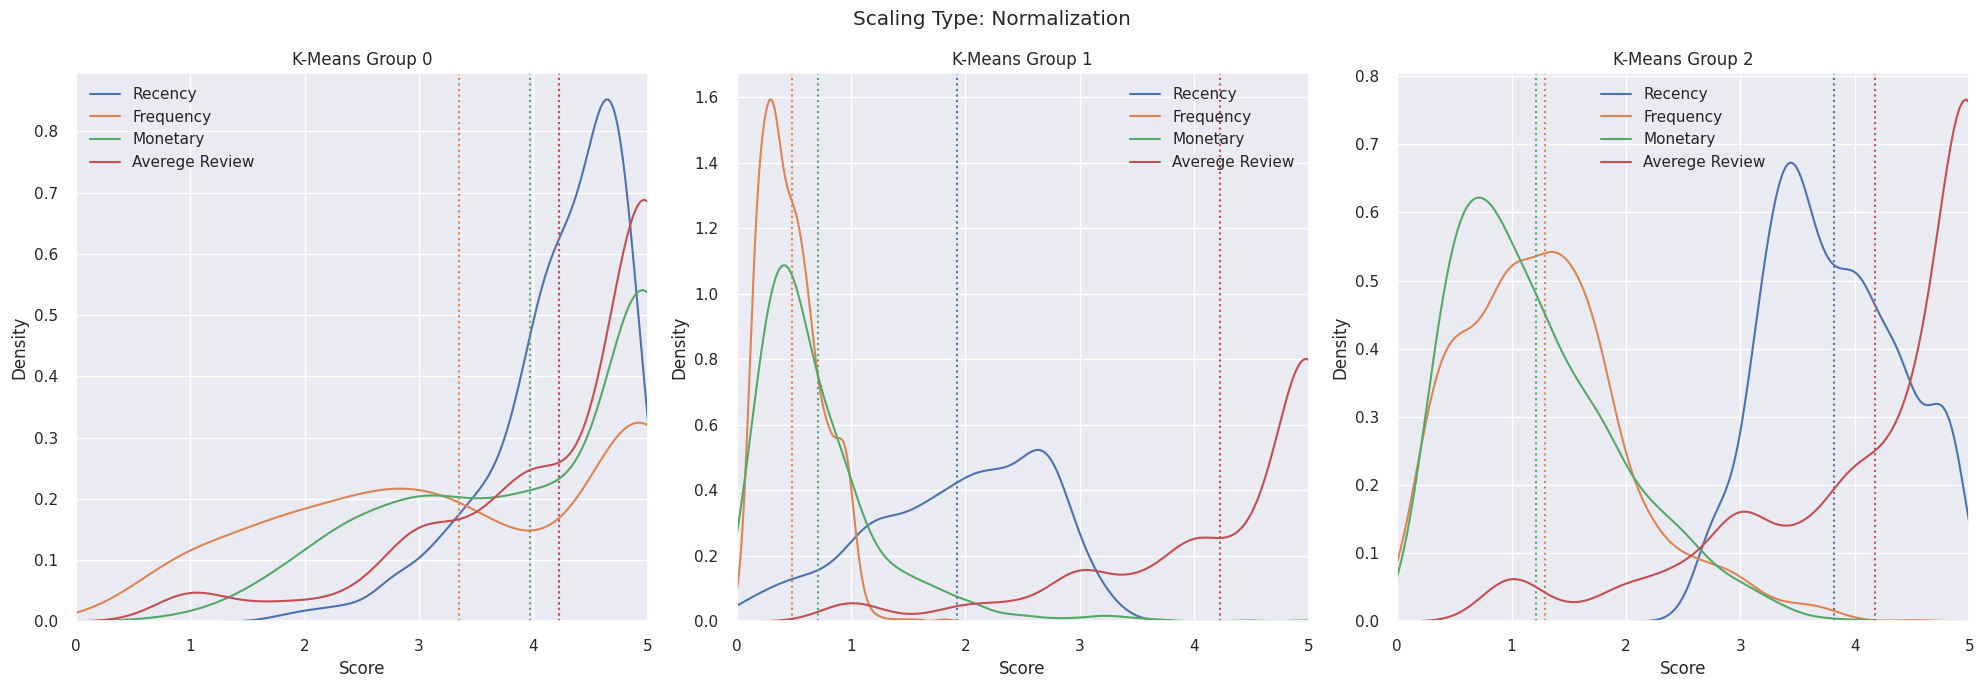

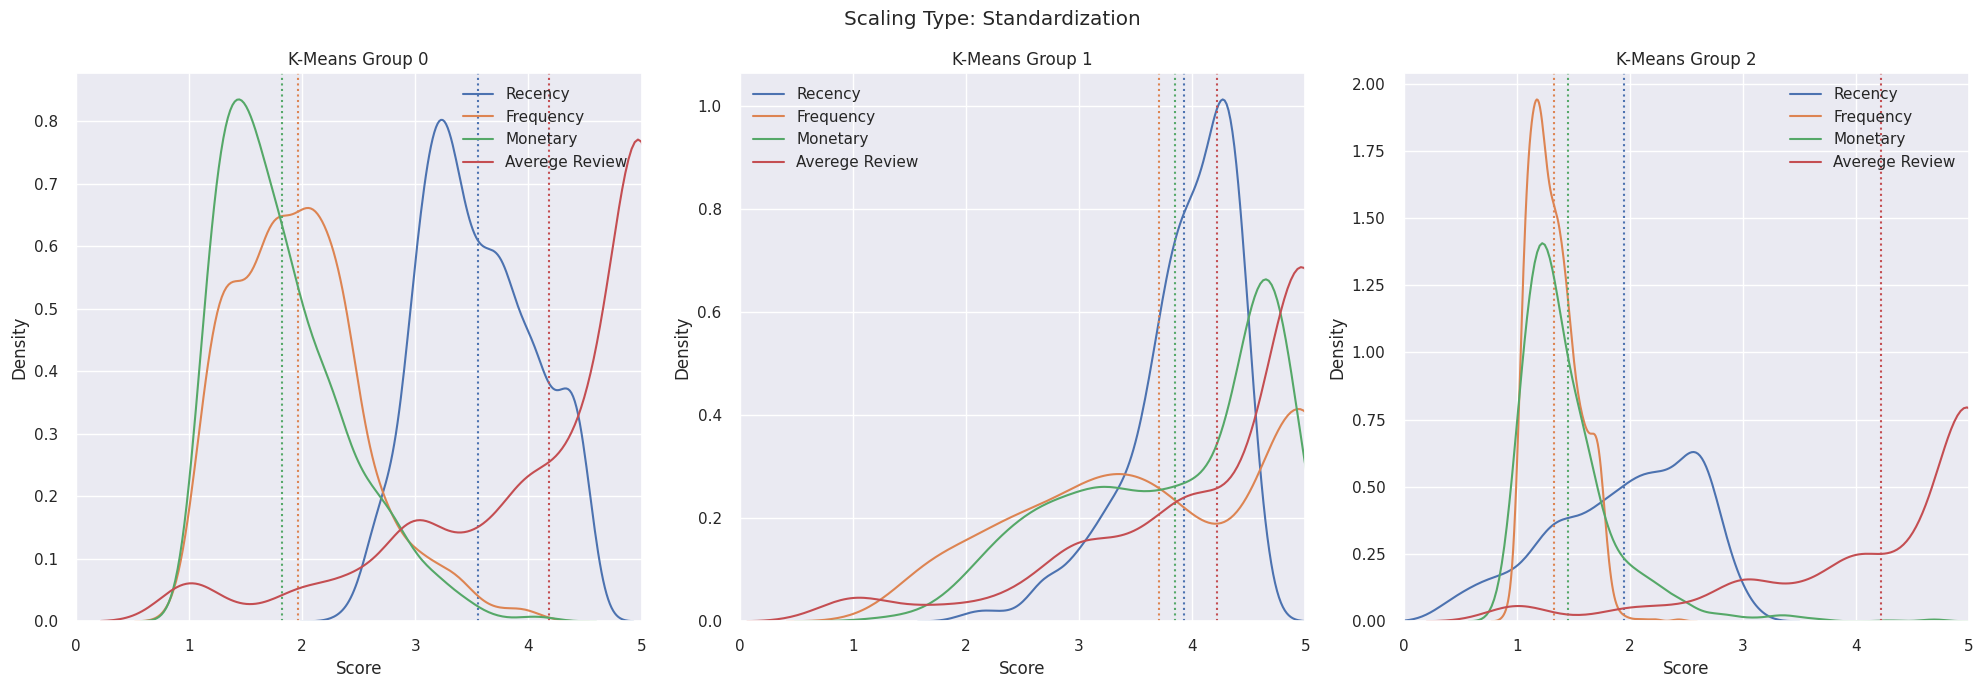

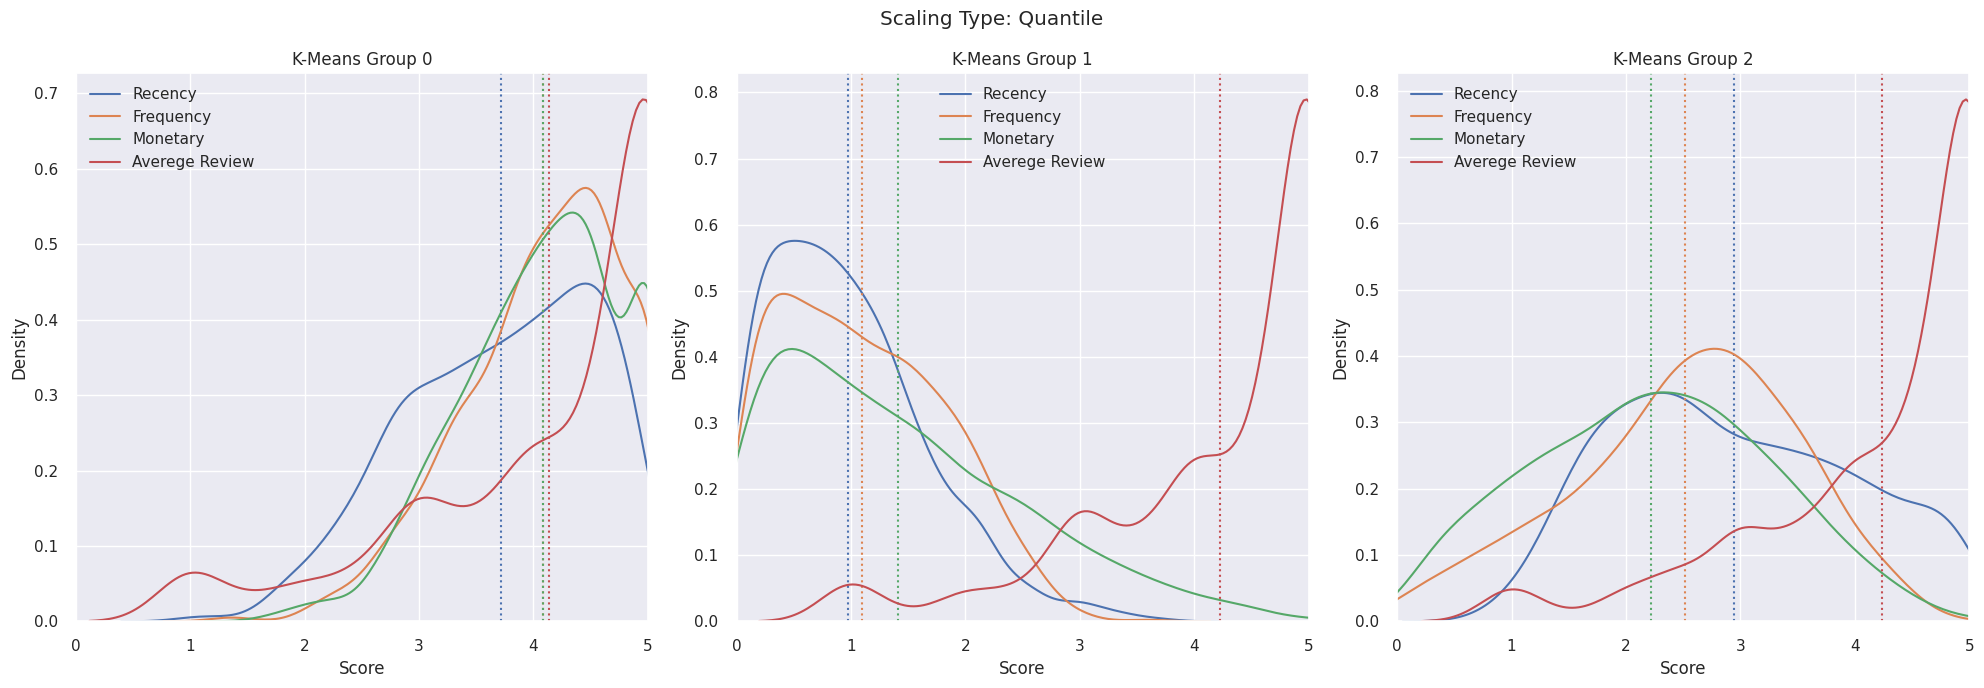

In [54]:
for scaling_type in ["min_max_scaled", "z_scaled", "quant_scaled"]:
    ax_idx = 0
    fig, axs = plt.subplots(nrows=1, ncols=3)
    # fig, axs = plt.subplots(nrows=1, ncols=4)
    axs = axs.flatten()

    fig.set_figwidth(20)
    fig.set_figheight(7)

    for group_label in sorted(
        rfm_with_cluster_kmeans[scaling_type + "_cluster_kmeans"].unique().tolist()
    ):
        group_df = rfm_with_cluster_kmeans.loc[
            rfm_with_cluster_kmeans[scaling_type + "_cluster_kmeans"] == group_label
        ]

        sns.set(style="darkgrid")
        sns.kdeplot(
            data=group_df,
            x="recency_" + scaling_type,
            color=theme_clrs[0],
            label="Recency",
            ax=axs[ax_idx],
        )
        axs[ax_idx].axvline(
            group_df["recency_" + scaling_type].mean(),
            color=theme_clrs[0],
            linestyle=":",
        )
        sns.kdeplot(
            data=group_df,
            x="frequency_" + scaling_type,
            color=theme_clrs[1],
            label="Frequency",
            ax=axs[ax_idx],
        )
        axs[ax_idx].axvline(
            group_df["frequency_" + scaling_type].mean(),
            color=theme_clrs[1],
            linestyle=":",
        )
        sns.kdeplot(
            data=group_df,
            x="monetary_" + scaling_type,
            color=theme_clrs[2],
            label="Monetary",
            ax=axs[ax_idx],
        )
        axs[ax_idx].axvline(
            group_df["monetary_" + scaling_type].mean(),
            color=theme_clrs[2],
            linestyle=":",
        )
        sns.kdeplot(
            data=group_df,
            x="avg_customer_review_score",
            color=theme_clrs[3],
            label="Averege Review",
            ax=axs[ax_idx],
        )
        axs[ax_idx].axvline(
            group_df["avg_customer_review_score"].mean(),
            color=theme_clrs[3],
            linestyle=":",
        )
        axs[ax_idx].set_xlim(left=0, right=5)
        axs[ax_idx].set_xlabel("Score")
        axs[ax_idx].set_title("K-Means Group " + str(group_label))
        axs[ax_idx].legend()

        ax_idx += 1

    plt.suptitle(
        "Scaling Type: "
        + (
            "Standardization"
            if scaling_type == "z_scaled"
            else "Normalization"
            if scaling_type == "min_max_scaled"
            else "Quantile"
        )
    )
    plt.tight_layout()
    plt.show()


In [55]:
for scaling_type in ["min_max_scaled", "z_scaled", "quant_scaled"]:
    fig = px.scatter_3d(
        rfm_with_cluster_kmeans,
        x="recency_" + scaling_type,
        y="frequency_" + scaling_type,
        z="monetary_" + scaling_type,
        labels={
            "recency_" + scaling_type: "Recency",
            "frequency_" + scaling_type: "Frequency",
            "monetary_" + scaling_type: "Monetary",
            scaling_type + "_cluster_kmeans": "K-Means Group",
        },
        color=scaling_type + "_cluster_kmeans",
        opacity=0.5,
    )

    fig.update_traces(marker_size=3)
    fig.layout.title = "Scaling Type: " + (
        "Standardization"
        if scaling_type == "z_scaled"
        else "Normalization"
        if scaling_type == "min_max_scaled"
        else "Quantile"
    )
    fig.show()
